# Fisrt EDA
# About Data
**This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [35]:
# Reading Data and Display it
data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [36]:
# Display Some Information about data like checknull , count of raws and coulmns and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**All data Dosen't have null and all data is a object expect three coulmns ( SeniorCitizen , tenure , monthlycharges ) float and integer**

In [37]:
# Feauture name
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
# Diplay Details About Feature Values Count
def GetDetailsOfFeatureName(FeatureName , data):
    print(data[FeatureName].value_counts())

In [39]:
# We want to make a Visualization of the data to know more about it
def Visulaize(FeatureName , data , hue=None,ax=None):
    
    #GetDetailsOfFeatureName(FeatureName , data = data)
    
    f, ax = plt.subplots(figsize=(4, 4))
    ax=sns.countplot(FeatureName , data=data , hue=hue , ax=ax)
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_title(FeatureName + " Distributions")
    
    total = float(len(data))
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x()+i.get_width()/2,height + 3,
                '{:.2f}%'.format((height/total)*100),fontsize=12 , ha="center")        

------- gender --------
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------
------- SeniorCitizen --------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------
------- Partner --------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------
------- Dependents --------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------
------- PhoneService --------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------
------- MultipleLines --------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

-------------------------------
------- InternetService --------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

-------------------------------
------- OnlineSecurity --------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-------------------------------
------- OnlineBackup --------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
-------------------------------
------- DeviceProtection --------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
-------------------------------
------- TechSupport --------
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
-------------------------------
------- StreamingTV --------
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

-------------------------------
------- StreamingMovies --------
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
-------------------------------
------- Contract --------
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
-------------------------------
------- PaperlessBilling --------
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
-------------------------------
------- PaymentMethod --------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
-------------------------------
------- Churn --------
No     5174
Yes    1869
Name: Churn, dtype: int64
-------------------------------


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


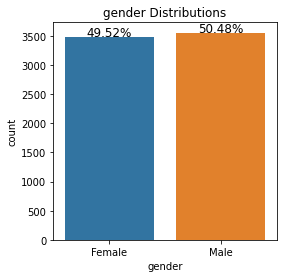

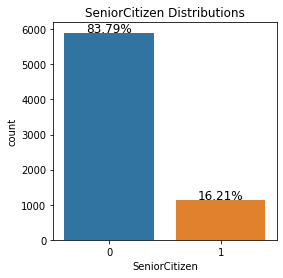

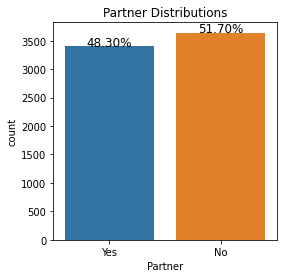

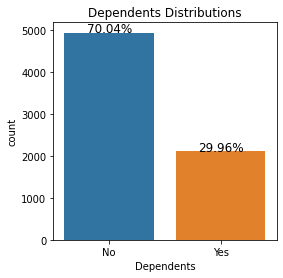

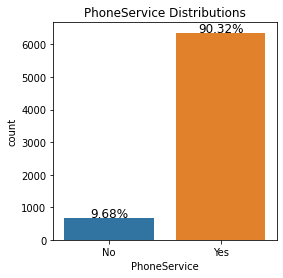

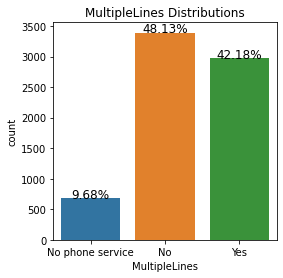

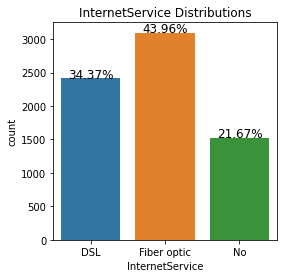

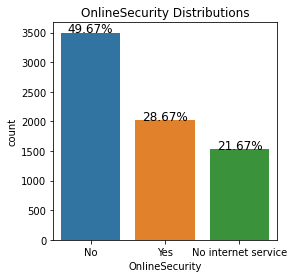

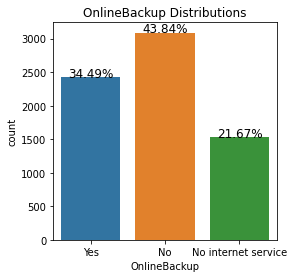

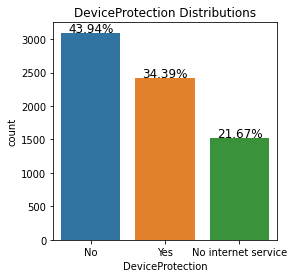

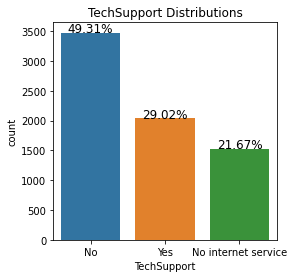

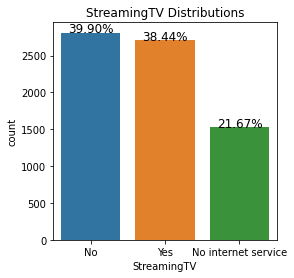

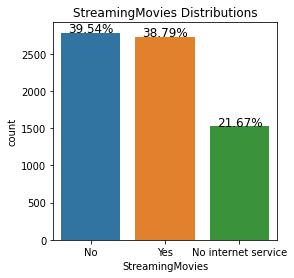

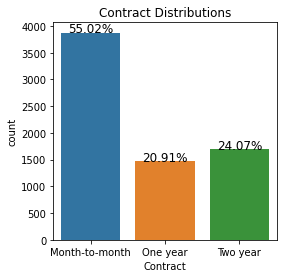

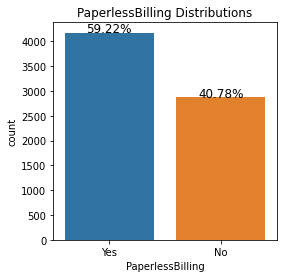

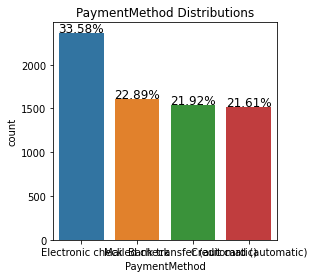

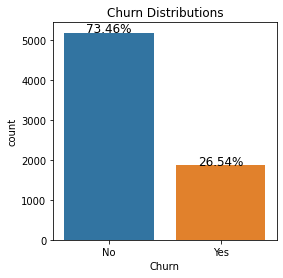

In [40]:
# Display Details About discret Data
for i in data.columns:
    if (i== "customerID") or (i == "MonthlyCharges") or (i == "TotalCharges") or (i == "tenure"):
        continue
   
    print("------- " + i + " --------")
    GetDetailsOfFeatureName(i , data=data)
    Visulaize(i,data=data)
    print("-------------------------------")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


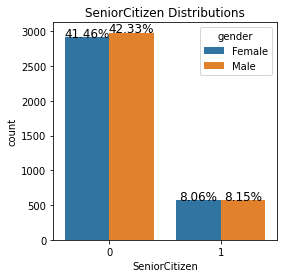

In [41]:
#Approximately Young of female equal Young of male
Visulaize("SeniorCitizen",hue='gender',data=data)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>

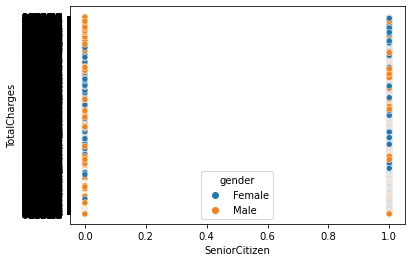

In [42]:
sns.scatterplot(x="SeniorCitizen",y='TotalCharges',hue='gender',data=data)


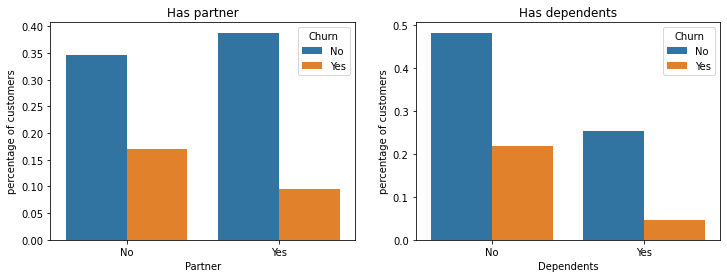

In [43]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = data.groupby('Partner')["Churn"].value_counts()/len(data)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = data.groupby('Dependents')["Churn"].value_counts()/len(data)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

**Data it is Consider is balance [ has partener ] , but people has dependent it is the most no churn**

# Conclusions

    *rate of female close to rate of male
    * Young are majority of the customers 48.3 % from clients are partners (rate of partners close to rate of non-partners)
    * 30% from clients are Dependents (non-Dependents are majority of the customers) 
    * more than 90% from clients use Phone Service , Phone Service is most used
    * 48% from clients have one line ( no.of customers who are used one line close to no.of customers who are used more one line)
    * Approximately 50% from clients are not use online security
    * Fiber optic is most used in internt service
    * Approximately 50% from clients are not use online Backup
    * 43,94% from clients are not use device protection
    * Approximately 50% from clients are not use tech support
    * 55.02% from clients has contract month-to-mounth
    * 60% from clients has parperlessbilling
    * electronic check is most used in paymentway
    * data is imbalance , no churn are majority
    *21.67% from clients are not used Internet Services which are ("InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Churn")
    * churned clients are not use internet services**

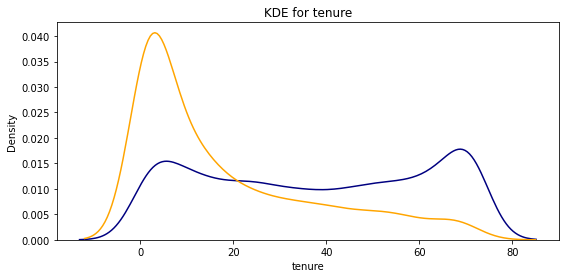

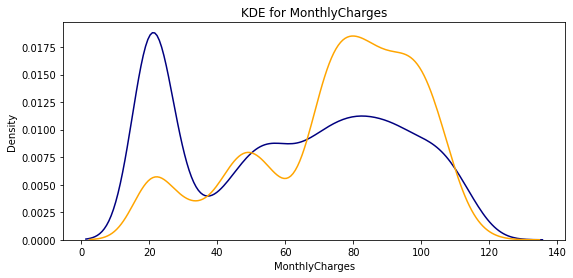

In [44]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
#kdeplot('TotalCharges')

**From the plots above we can conclude that:

    Recent clients are more likely to churn
    Clients with higher MonthlyCharges are also more likely to churn
    Tenure and MonthlyCharges are probably important features**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


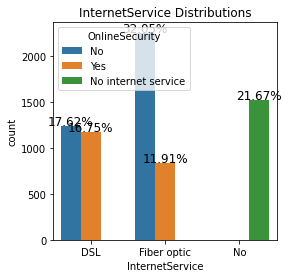

In [45]:
Visulaize("InternetService", data=data , hue="OnlineSecurity"  )

**We note that the number of people who use a service Online Security with Internet Service is close in DSL but in fiber No OnlineSecurity is the most**

In [46]:
# 21.67% from clients are not used Internet Services which are 
df_internet_service = data[["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Churn"]]
df_internet_service

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,DSL,No,Yes,No,No,No,No,No
1,DSL,Yes,No,Yes,No,No,No,No
2,DSL,Yes,Yes,No,No,No,No,Yes
3,DSL,Yes,No,Yes,Yes,No,No,No
4,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,DSL,Yes,No,No,No,No,No,No
7041,Fiber optic,No,No,No,No,No,No,Yes


In [47]:
df_internet_service.groupby('InternetService').count()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
InternetService,,,,,,,
DSL,2421,2421,2421,2421,2421,2421,2421
Fiber optic,3096,3096,3096,3096,3096,3096,3096
No,1526,1526,1526,1526,1526,1526,1526


In [48]:
df_internet_service['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [49]:
# 21.67% clients are not use internet services
df_no__internet_service=df_internet_service.loc[df_internet_service['OnlineSecurity']=='No internet service']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


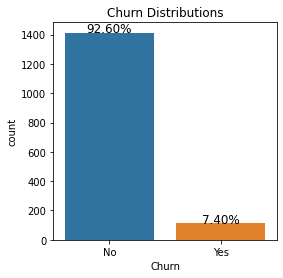

In [50]:
# 7% churned clients are not use internet services
Visulaize("Churn",data=df_no__internet_service)

**Most OF People Have Internet Services Don't Churn , and it logic**

In [51]:
## 78.33% clients use internet services
df_yes__internet_service=df_internet_service.loc[df_internet_service['InternetService']!='No']
df_yes__internet_service.shape

(5517, 8)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


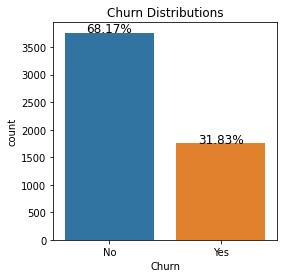

In [52]:
Visulaize("Churn",data=df_yes__internet_service)

**Most People Has yes of Internet Service Dont Churn**

In [53]:
df_No__internet_service=df_internet_service.loc[df_internet_service['InternetService']!='Yes']
df_No__internet_service.shape

(7043, 8)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


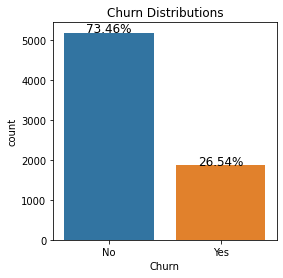

In [54]:
Visulaize("Churn",data=df_No__internet_service)

**Note That Internet Service Dosen't impact to churn as   yes and no .. has the same about**

# Seconed Processing Data

In [55]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [56]:
# Converting Text into int
from sklearn.preprocessing import LabelEncoder
enc  = LabelEncoder()

for i in data.columns:
    
    if (i== "customerID") or (i == "MonthlyCharges") or (i == "TotalCharges") or (i == "tenure"):
        continue
        
    data[i] = enc.fit_transform(data[i])
    
print("All Data Transformed expected Continuos Data")




All Data Transformed expected Continuos Data


In [57]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


**Splitting Data into X , y**

In [58]:
X = data.drop(['customerID' , 'Churn' ],axis=1)
y = data['Churn']

**Splitting Data into X , y**

In [59]:
print(X.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [60]:
# There Are An Coulmn dtype is object and there are null value
#but it is a string we can't contract with it so we fill it by any value

#mode value
from scipy import stats
mode= stats.mode(X['TotalCharges'])
print(mode)

# There Are 11 null value

ModeResult(mode=array([' '], dtype=object), count=array([11]))


In [61]:
# We Will fill null value with any Value suppose = 1500 By Mean
X['TotalCharges'] = X['TotalCharges'].replace(' ', '1500' )


In [62]:
# Now We Can Convert Coulmn From Object [String] to Number
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'])
print(X.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [63]:
# Splitting Data Into Train , Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True, random_state=42)

print('X_train \n' , X_train)
print('X_test \n' , X_test)
print('y_train \n' ,y_train)
print('y_test \n' , y_test)

X_train 
       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
298        1              0        1           1      40             1   
3318       1              0        0           0      10             0   
5586       0              0        0           0      27             1   
6654       0              0        1           0       7             1   
5362       1              0        1           1      65             1   
...      ...            ...      ...         ...     ...           ...   
3772       1              0        1           0       1             1   
5191       0              0        1           1      23             1   
5226       1              0        1           1      12             1   
5390       1              1        0           0      12             1   
860        1              0        0           0      26             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
298               2            

In [88]:
#Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Applying LogisticRegression Model 

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
#print('----------------------------------------------------')

#Calculating Prediction
y_predL = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)

cm = confusion_matrix(y_test, y_predL)
	
cm
#print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])


LogisticRegressionModel Train Score is :  0.7721492157693938
LogisticRegressionModel Test Score is :  0.7729032258064517
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [100]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[1479,  218],
       [ 310,  318]])

In [89]:
#Import Libraries
from sklearn.tree import DecisionTreeClassifier
#----------------------------------------------------
#Applying DecisionTreeClassifier Model 


DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

#Calculating Prediction
y_predD = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)

cm = confusion_matrix(y_test, y_predD)
	
cm

#print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.7825349724459517
DecisionTreeClassifierModel Test Score is :  0.7780645161290323
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.         0.         0.1020524  0.
 0.         0.         0.17093024 0.         0.         0.
 0.         0.         0.67921777 0.         0.         0.04779959
 0.        ]


array([[1533,  164],
       [ 352,  276]])

In [90]:
#Import Libraries
from sklearn.ensemble import RandomForestClassifier
#Applying RandomForestClassifier Model 

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
#print('----------------------------------------------------')

#Calculating Prediction
y_predR = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)

cm = confusion_matrix(y_test, y_predR)
	
cm
#print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.7621873675286138
RandomForestClassifierModel Test Score is :  0.7703225806451612
RandomForestClassifierModel features importances are :  [0.00000000e+00 3.49729504e-03 3.72666362e-03 7.51769656e-03
 1.45852509e-01 0.00000000e+00 1.57355309e-04 4.04535244e-02
 1.98055854e-01 7.79548651e-02 9.59910310e-03 1.46111937e-01
 5.09495107e-03 3.12783754e-03 2.34612060e-01 5.32042457e-03
 1.02346484e-02 6.71098354e-02 4.15734401e-02]


array([[1680,   17],
       [ 517,  111]])

In [93]:
#Import Libraries
from sklearn.neural_network import MLPClassifier


MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                    # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
#print('----------------------------------------------------')

#Calculating Prediction
y_predNN = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)

cm = confusion_matrix(y_test, y_predNN)
	
cm
#print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])

MLPClassifierModel Train Score is :  0.8005510809665113
MLPClassifierModel Test Score is :  0.8034408602150538
MLPClassifierModel loss is :  0.45059767653347665
MLPClassifierModel No. of iterations is :  31
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  logistic


array([[1585,  112],
       [ 345,  283]])

In [94]:
models = pd.DataFrame({
    'Model': [ 'LogisticRegressionModel',
              'DecisionTreeClassifierModel',
              'RandomForestClassifierModel',
              'MLPClassifierModel'
             ],
    'Score': [LogisticRegressionModel.score(X_train , y_train) ,DecisionTreeClassifierModel.score(X_train, y_train) , RandomForestClassifierModel.score(X_train, y_train ) , MLPClassifierModel.score(X_train , y_train)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,MLPClassifierModel,0.800551
1,DecisionTreeClassifierModel,0.782535
0,LogisticRegressionModel,0.772149
2,RandomForestClassifierModel,0.762187


**The Best Model is DecisionTreeClassifierModel**

In [98]:
#Import Libraries
from sklearn.metrics import classification_report
#----------------------------------------------------
#Calculating classification Report :  
classification_report(y_test, y_predNN, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n ', ClassificationReport )

Classification Report is : 
                precision    recall  f1-score   support

           0       0.76      0.99      0.86      1697
           1       0.87      0.18      0.29       628

    accuracy                           0.77      2325
   macro avg       0.82      0.58      0.58      2325
weighted avg       0.79      0.77      0.71      2325



**With Best Wishes**